In [19]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [11]:
data=pd.read_csv("/content/Customer_Data.csv")

In [12]:
data.head()

,Customer ID,Age,Gender,Annual Income,Spending Score
0,1,62,Male,56564,86
1,2,65,Male,25393,73
2,3,18,Male,143520,39
3,4,21,Male,64711,43
4,5,21,Male,147014,98


In [14]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 5 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   Customer ID     1000 non-null   int64 
 1   Age             1000 non-null   int64 
 2   Gender          1000 non-null   object
 3   Annual Income   1000 non-null   int64 
 4   Spending Score  1000 non-null   int64 
dtypes: int64(4), object(1)
memory usage: 39.2+ KB


In [17]:
data.describe()

,Customer ID,Age,Annual Income,Spending Score
count,1000.000000,1000.000000,1000.000000,1000.000000
mean,500.500000,43.267000,84856.809000,47.859000
std,288.819436,15.242311,38393.323903,28.606038
min,1.000000,18.000000,20359.000000,1.000000
25%,250.750000,30.000000,51173.750000,23.000000
50%,500.500000,43.000000,84462.000000,47.000000
75%,750.250000,56.000000,118356.250000,73.000000
max,1000.000000,69.000000,149870.000000,99.000000


In [22]:
data.shape

(1000, 5)

In [23]:
data.isnull().sum()
# no missing data

Customer ID       0
Age               0
Gender            0
Annual Income     0
Spending Score    0
dtype: int64

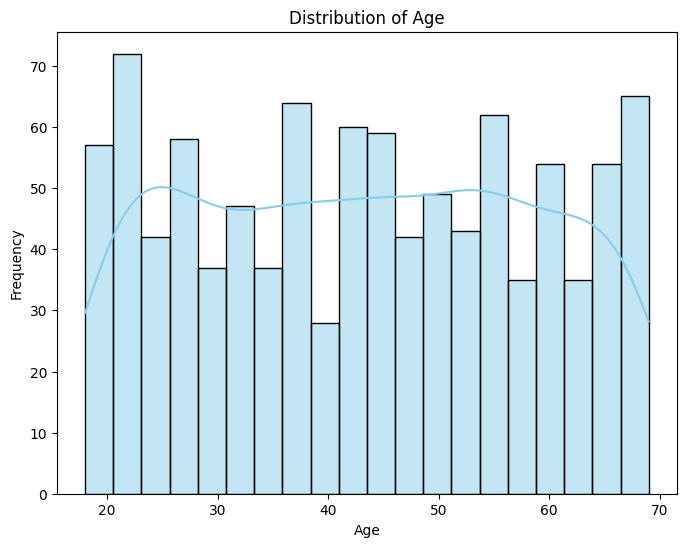

In [20]:
plt.figure(figsize=(8, 6))
sns.histplot(data['Age'], bins=20, kde=True, color='skyblue')
plt.title('Distribution of Age')
plt.xlabel('Age')
plt.ylabel('Frequency')
plt.show()

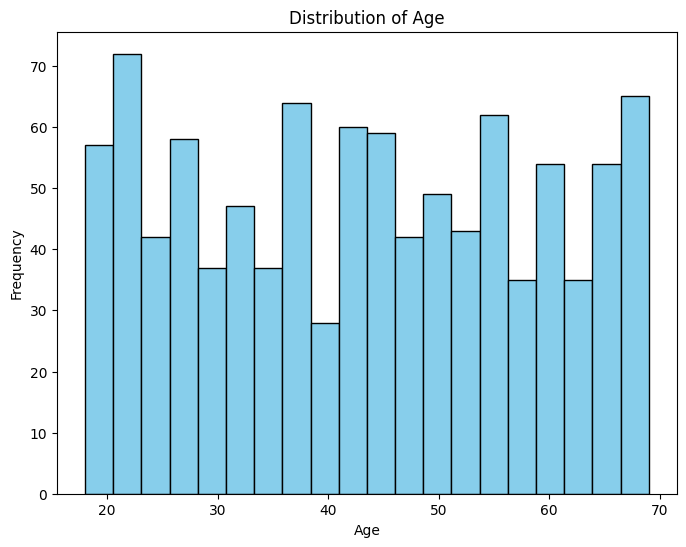

In [24]:
# Histogram of Age
plt.figure(figsize=(8, 6))
plt.hist(data['Age'], bins=20, color='skyblue', edgecolor='black')
plt.title('Distribution of Age')
plt.xlabel('Age')
plt.ylabel('Frequency')
plt.show()

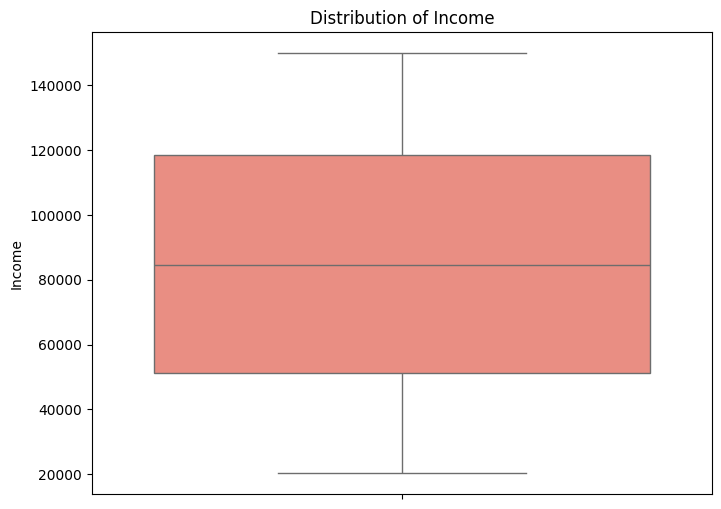

In [28]:
# Box plot of Income
plt.figure(figsize=(8, 6))
sns.boxplot(y=data['Annual Income'], color='salmon')
plt.title('Distribution of Income')
plt.ylabel('Income')
plt.show()

<ipython-input-29-af72871c826d>:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x='Gender', data=data, palette='pastel')


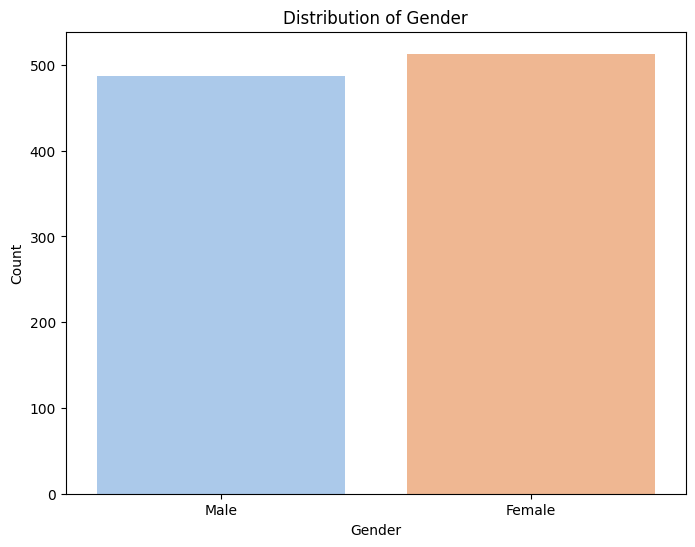

In [29]:
# Bar plot of Gender
plt.figure(figsize=(8, 6))
sns.countplot(x='Gender', data=data, palette='pastel')
plt.title('Distribution of Gender')
plt.xlabel('Gender')
plt.ylabel('Count')
plt.show()

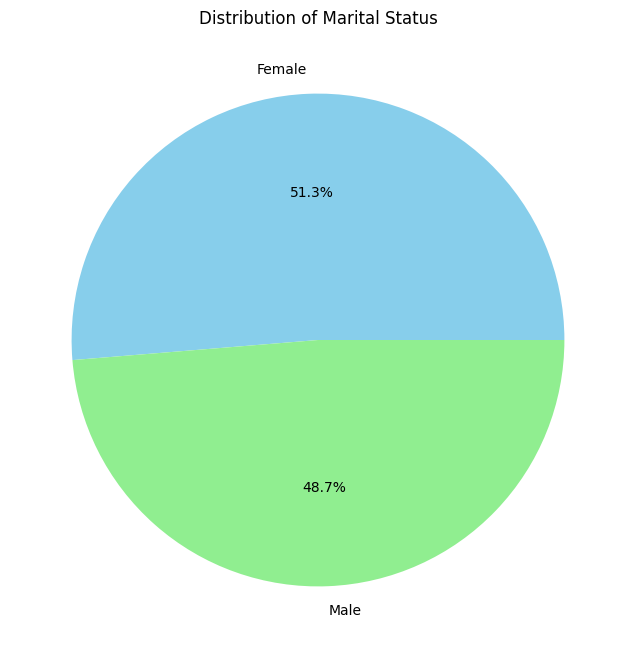

In [32]:
# Pie chart of Marital Status
plt.figure(figsize=(8, 8))
data['Gender'].value_counts().plot(kind='pie', autopct='%1.1f%%', colors=['skyblue', 'lightgreen', 'lightcoral'])
plt.title('Distribution of Marital Status')
plt.ylabel('')
plt.show()

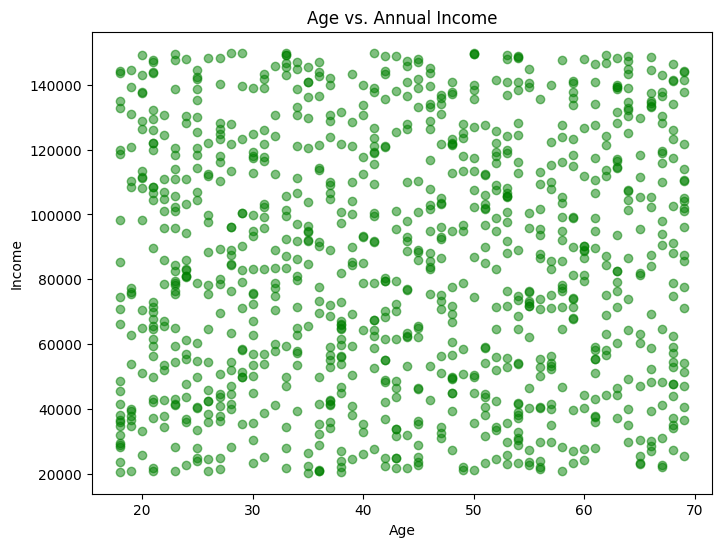

In [34]:
# Scatter plot of Age vs. Income
plt.figure(figsize=(8, 6))
plt.scatter(data['Age'], data['Annual Income'], color='green', alpha=0.5)
plt.title('Age vs. Annual Income')
plt.xlabel('Age')
plt.ylabel('Income')
plt.show()

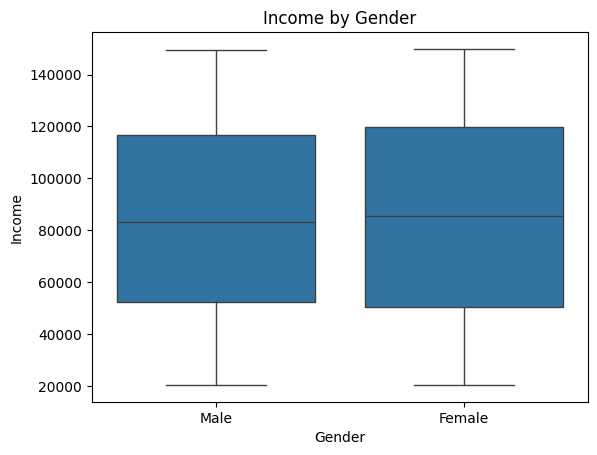

In [38]:
sns.boxplot(x='Gender', y='Annual Income', data=data)
plt.title('Income by Gender')
plt.xlabel('Gender')
plt.ylabel('Income')
plt.show()


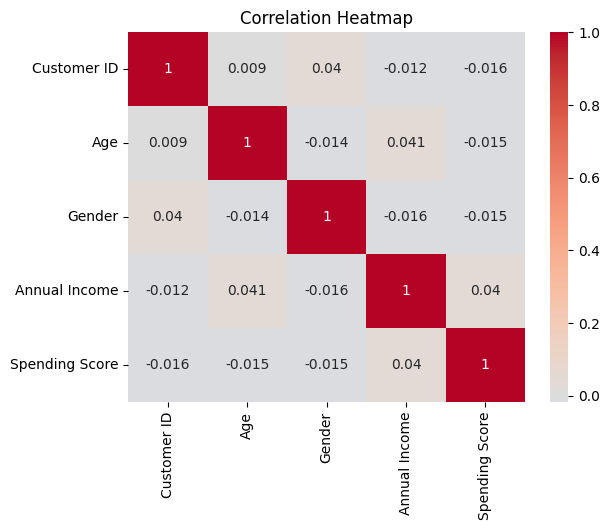

In [41]:
# Encoding categorical columns
df_encoded = data.copy()
df_encoded['Gender'] = df_encoded['Gender'].astype('category').cat.codes

# Correlation Heatmap
corr = df_encoded.corr()
sns.heatmap(corr, annot=True, cmap='coolwarm', center=0)
plt.title('Correlation Heatmap')
plt.show()


In [42]:
data.head()

,Customer ID,Age,Gender,Annual Income,Spending Score
0,1,62,Male,56564,86
1,2,65,Male,25393,73
2,3,18,Male,143520,39
3,4,21,Male,64711,43
4,5,21,Male,147014,98


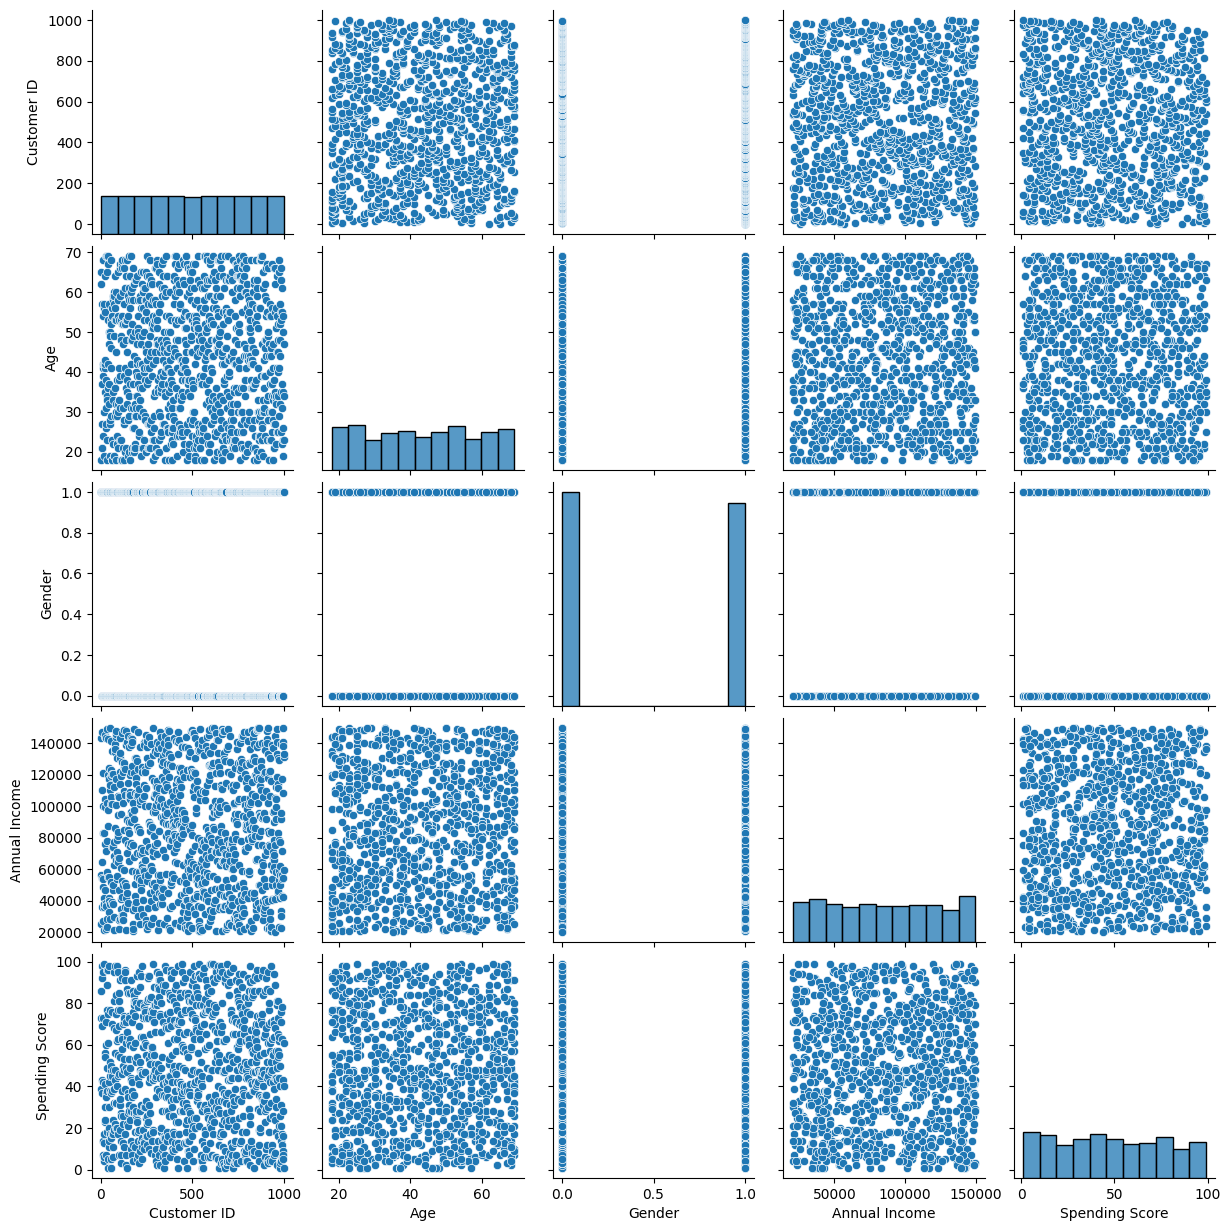

In [43]:
#multivariate analysis
# Encoding categorical columns for pair plot
df_encoded = data.copy()
df_encoded['Gender'] = df_encoded['Gender'].astype('category').cat.codes

# Pair Plot
sns.pairplot(df_encoded)
plt.show()


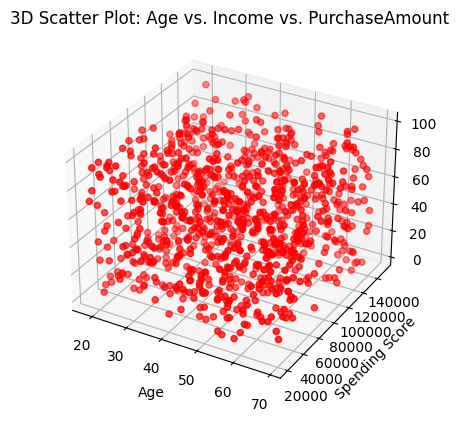

In [49]:

from mpl_toolkits.mplot3d import Axes3D

# 3D Scatter Plot (Age, Income, PurchaseAmount)
fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')
ax.scatter(data['Age'], data['Annual Income'],data['Spending Score'], c='r', marker='o')

ax.set_xlabel('Age')
ax.set_ylabel('Annual Income')
ax.set_ylabel('Spending Score')
plt.title('3D Scatter Plot: Age vs. Income vs. PurchaseAmount')
plt.show()



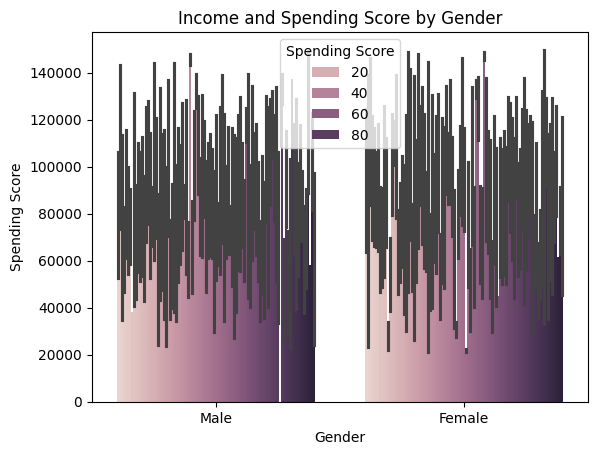

In [51]:
# Grouped Bar Plot (Gender, Income, PurchaseAmount)
sns.barplot(x='Gender', y='Annual Income', hue='Spending Score', data=data)
plt.title('Income and Spending Score by Gender')
plt.xlabel('Gender')
plt.ylabel('Spending Score')
plt.show()


In [52]:
from sklearn.preprocessing import StandardScaler, MinMaxScaler

In [54]:
# One-hot encoding for categorical variables
df_encoded = pd.get_dummies(data, columns=['Gender'], drop_first=True)


In [56]:
df_encoded.head()

,Customer ID,Age,Annual Income,Spending Score,Gender_Male
0,1,62,56564,86,True
1,2,65,25393,73,True
2,3,18,143520,39,True
3,4,21,64711,43,True
4,5,21,147014,98,True


In [57]:
# Selecting numerical columns
numerical_features = ['Age', 'Annual Income', 'Spending Score']


In [58]:
# Standardization with StandardScaler
scaler = StandardScaler()
df_encoded[numerical_features] = scaler.fit_transform(df_encoded[numerical_features])


In [59]:
# Normalization with MinMaxScaler
scaler = MinMaxScaler()
df_encoded[numerical_features] = scaler.fit_transform(df_encoded[numerical_features])


In [61]:
df_encoded

,Customer ID,Age,Annual Income,Spending Score,Gender_Male
0,1,0.862745,0.279552,0.867347,True
1,2,0.921569,0.038869,0.734694,True
2,3,0.000000,0.950969,0.387755,True
3,4,0.058824,0.342457,0.428571,True
4,5,0.058824,0.977948,0.989796,True
...,...,...,...,...,...
995,996,0.705882,0.912363,0.040816,False
996,997,0.019608,0.680074,0.153061,True
997,998,0.568627,0.855093,0.612245,True
998,999,0.098039,0.300924,0.000000,True


In [63]:
from sklearn.preprocessing import LabelEncoder


In [64]:
# Label encoding for categorical variables
label_encoder = LabelEncoder()
data['Gender'] = label_encoder.fit_transform(data['Gender'])

# Check the unique values after encoding
print(data['Gender'].unique())


[1 0]


In [65]:
from sklearn.model_selection import train_test_split

In [66]:
# Split the data into features (X) and target variable (y)
X = data[['Age', 'Annual Income', 'Gender']]
y = data['Spending Score']


In [67]:
data.head()

,Customer ID,Age,Gender,Annual Income,Spending Score
0,1,62,1,56564,86
1,2,65,1,25393,73
2,3,18,1,143520,39
3,4,21,1,64711,43
4,5,21,1,147014,98


In [68]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [70]:
from sklearn.cluster import KMeans
kmeans = KMeans(n_clusters=3, random_state=42)
X_train['Cluster'] = kmeans.fit_predict(X_train)


/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


In [71]:
X_test['Cluster'] = kmeans.predict(X_test)

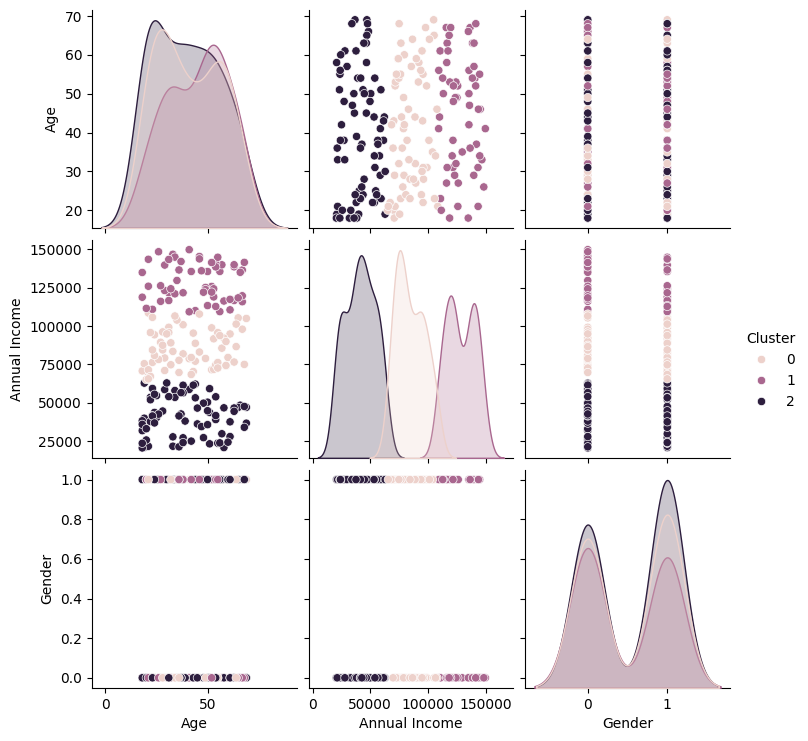

In [73]:
sns.pairplot(X_test, hue='Cluster', vars=['Age', 'Annual Income', 'Gender'])
plt.show()

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:8

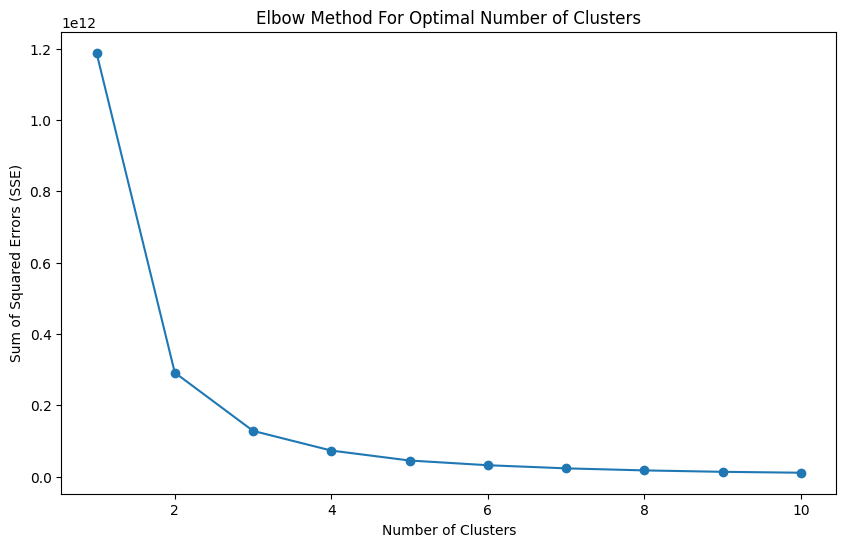

In [74]:
sse = []
k_range = range(1, 11)
for k in k_range:
    kmeans = KMeans(n_clusters=k, random_state=42)
    kmeans.fit(X_train)
    sse.append(kmeans.inertia_)

plt.figure(figsize=(10, 6))
plt.plot(k_range, sse, marker='o')
plt.xlabel('Number of Clusters')
plt.ylabel('Sum of Squared Errors (SSE)')
plt.title('Elbow Method For Optimal Number of Clusters')
plt.show()


/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


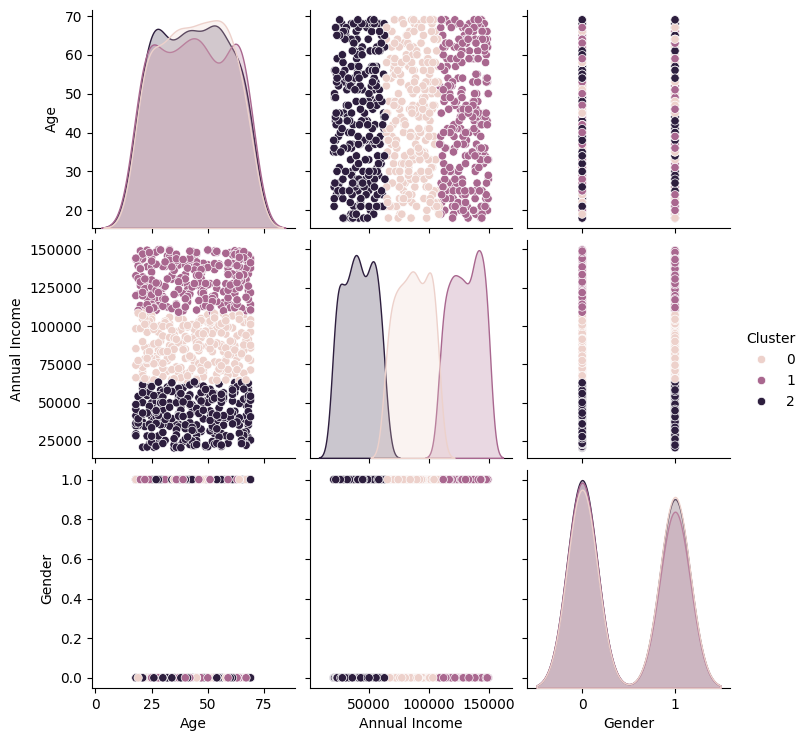

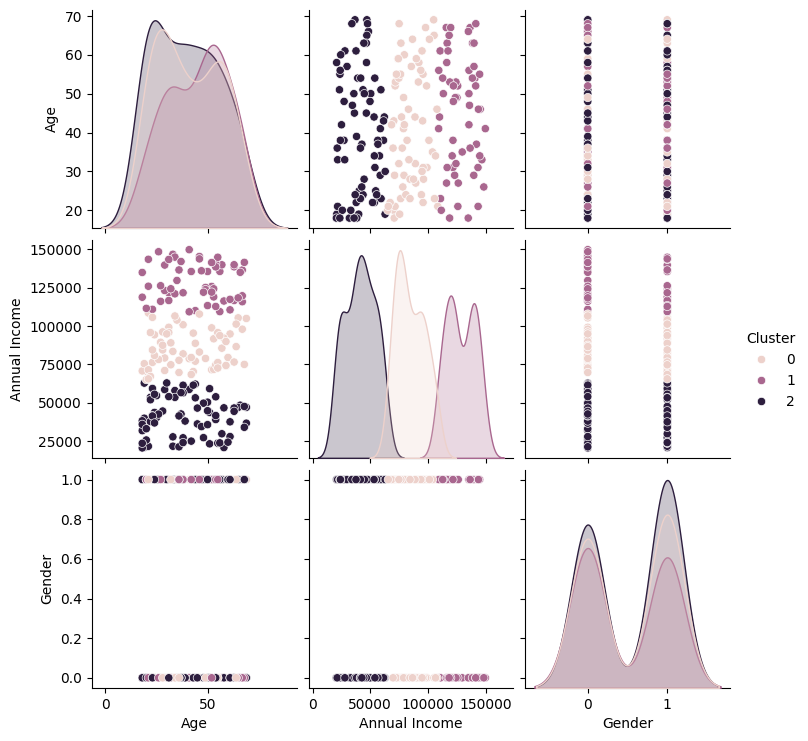

In [76]:
optimal_k = 3
kmeans = KMeans(n_clusters=optimal_k, random_state=42)
X_train['Cluster'] = kmeans.fit_predict(X_train)

sns.pairplot(X_train, hue='Cluster', vars=['Age', 'Annual Income', 'Gender'])
plt.show()

X_test['Cluster'] = kmeans.predict(X_test)
sns.pairplot(X_test, hue='Cluster', vars=['Age', 'Annual Income', 'Gender'])
plt.show()


In [77]:
from sklearn.metrics import silhouette_score, davies_bouldin_score

In [78]:
silhouette_avg_train = silhouette_score(X_train, X_train['Cluster'])

In [79]:
silhouette_avg_train

0.5946465908320087

In [80]:
davies_bouldin_avg_train = davies_bouldin_score(X_train, X_train['Cluster'])
davies_bouldin_avg_train

0.4962761906737356

In [81]:
silhouette_avg_test = silhouette_score(X_test, X_test['Cluster'])
silhouette_avg_test

0.6014516291063576

In [82]:
davies_bouldin_avg_test = davies_bouldin_score(X_test, X_test['Cluster'])
davies_bouldin_avg_test

0.48938069975652204